In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Import Data

In [67]:
df_raw=pd.read_csv('train_BRCpofr.csv')
df_raw.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [68]:
df=df_raw.copy()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


## Data Preprocessing

In [70]:
p_null=(df.isna().sum())/(df.shape[0])
p_null

id                0.0
gender            0.0
area              0.0
qualification     0.0
income            0.0
marital_status    0.0
vintage           0.0
claim_amount      0.0
num_policies      0.0
policy            0.0
type_of_policy    0.0
cltv              0.0
dtype: float64

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


### Test for P-Value and Correlation

In [72]:
columns=df.columns
columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [73]:
for col in columns:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

id 
--------------------
 Unique :89392
--------------------
--------------------
1        1
59593    1
59601    1
59600    1
59599    1
        ..
29796    1
29795    1
29794    1
29793    1
89392    1
Name: id, Length: 89392, dtype: int64 

gender 
--------------------
 Unique :2
--------------------
--------------------
Male      50497
Female    38895
Name: gender, dtype: int64 

area 
--------------------
 Unique :2
--------------------
--------------------
Urban    62455
Rural    26937
Name: area, dtype: int64 

qualification 
--------------------
 Unique :3
--------------------
--------------------
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64 

income 
--------------------
 Unique :4
--------------------
--------------------
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64 

marital_status 
--------------------
 Unique :2
--------------------
-----------------

In [74]:
df.drop('id',axis=1,inplace=True)

#### Ordinal and Binary category Encoding

In [75]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [76]:
df['gender']=df['gender'].map({'Male':1, 'Female':0})

In [77]:
df.area.unique()

array(['Urban', 'Rural'], dtype=object)

In [78]:
df['area']=df['area'].map({'Urban':1, 'Rural':0})

In [79]:
df.qualification.unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [80]:
df['qualification']=df['qualification'].map({'Bachelor':2, 'High School':1, 'Others':0})

In [81]:
df.income.unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [82]:
df['income']=df['income'].map({'5L-10L':2, 'More than 10L':3, '2L-5L':1, '<=2L':0})

In [83]:
df.num_policies.unique()

array(['More than 1', '1'], dtype=object)

In [84]:
df['num_policies']=df['num_policies'].map({'More than 1':1, '1':0})

In [85]:
df.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [86]:
df['type_of_policy']=df['type_of_policy'].map({'Platinum':2, 'Gold':1, 'Silver':0})

In [87]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['gender',
 'area',
 'qualification',
 'income',
 'marital_status',
 'vintage',
 'claim_amount',
 'num_policies',
 'type_of_policy',
 'cltv']

In [88]:
#Find the number of non-numeric columns 
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['policy']

### ANOVA Test

In [89]:
X_cat=not_numeric
y_num=numeric[-1:]

In [90]:
from scipy.stats import f_oneway

In [91]:
CategoryGroupLists=df.groupby('policy')['cltv'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print(f'P-Value of the Anova Test:{AnovaResults[1]}')

P-Value of the Anova Test:4.893535365473623e-75


### Pearson Correlation

<AxesSubplot:>

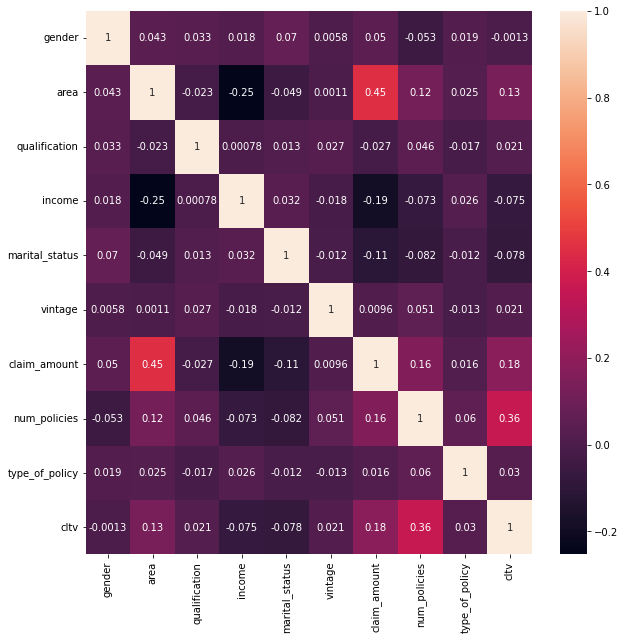

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method ='pearson'),annot=True)

In [93]:
CategoryGroupLists=df_raw.groupby('gender')['cltv'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print(f'P-Value of the Anova Test:{AnovaResults[1]}')

P-Value of the Anova Test:0.693604522475604


In [94]:
df.drop('gender',axis=1,inplace=True)

##### As the output of the P-value is more then 0.05, hence, we accept H0. Which means the variables are not correlated with each other.

In [95]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['area',
 'qualification',
 'income',
 'marital_status',
 'vintage',
 'claim_amount',
 'num_policies',
 'type_of_policy',
 'cltv']

In [96]:
df_numeric=df[numeric]

In [97]:
df_numeric.head()

,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv
0,1,2,2,1,5,5790,1,2,64308
1,0,1,2,0,8,5080,1,2,515400
2,1,2,2,1,8,2599,1,2,64212
3,0,1,2,0,7,0,1,2,97920
4,1,1,3,1,6,3508,1,1,59736


### Multi Colinearity

**One should always be concerned about the collinearity, regardless of the model/method being linear or not, or the main task being prediction or classification**

In [98]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [99]:
calc_vif(df_numeric[:-1])

,variables,VIF
0,area,3.994788
1,qualification,5.728831
2,income,5.910134
3,marital_status,2.251803
4,vintage,4.412055
5,claim_amount,3.511299
6,num_policies,3.518154
7,type_of_policy,3.271773
8,cltv,2.527732


**VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others**

In [100]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix =df.corr().abs()
corr_matrix.head()

,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv
area,1.000000,0.022908,0.252890,0.048739,0.001145,0.451054,0.121898,0.025001,0.133107
qualification,0.022908,1.000000,0.000780,0.012618,0.027283,0.027440,0.045894,0.016678,0.021330
income,0.252890,0.000780,1.000000,0.031632,0.017830,0.193800,0.072862,0.025746,0.074871
marital_status,0.048739,0.012618,0.031632,1.000000,0.011686,0.114924,0.082363,0.011528,0.077744
vintage,0.001145,0.027283,0.017830,0.011686,1.000000,0.009579,0.050699,0.012614,0.020608


In [101]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv
area,NaN,0.022908,0.25289,0.048739,0.001145,0.451054,0.121898,0.025001,0.133107
qualification,NaN,NaN,0.00078,0.012618,0.027283,0.027440,0.045894,0.016678,0.021330
income,NaN,NaN,NaN,0.031632,0.017830,0.193800,0.072862,0.025746,0.074871
marital_status,NaN,NaN,NaN,NaN,0.011686,0.114924,0.082363,0.011528,0.077744
vintage,NaN,NaN,NaN,NaN,NaN,0.009579,0.050699,0.012614,0.020608


In [102]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 0 columns to remove.


**AS VIF are near by 5 we are not trying to drop the column**

### Nominal Encoding

In [103]:
df=pd.get_dummies(df,columns = ['policy'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   area            89392 non-null  int64
 1   qualification   89392 non-null  int64
 2   income          89392 non-null  int64
 3   marital_status  89392 non-null  int64
 4   vintage         89392 non-null  int64
 5   claim_amount    89392 non-null  int64
 6   num_policies    89392 non-null  int64
 7   type_of_policy  89392 non-null  int64
 8   cltv            89392 non-null  int64
 9   policy_A        89392 non-null  uint8
 10  policy_B        89392 non-null  uint8
 11  policy_C        89392 non-null  uint8
dtypes: int64(9), uint8(3)
memory usage: 6.4 MB


## EDA

In [105]:
numeric_new=[]
for label,content in df_raw.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new.append(label)
numeric_new

['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

In [106]:
numericdf=df_raw[numeric_new]

In [107]:
numericdf.head()

,id,marital_status,vintage,claim_amount,cltv
0,1,1,5,5790,64308
1,2,0,8,5080,515400
2,3,1,8,2599,64212
3,4,0,7,0,97920
4,5,1,6,3508,59736


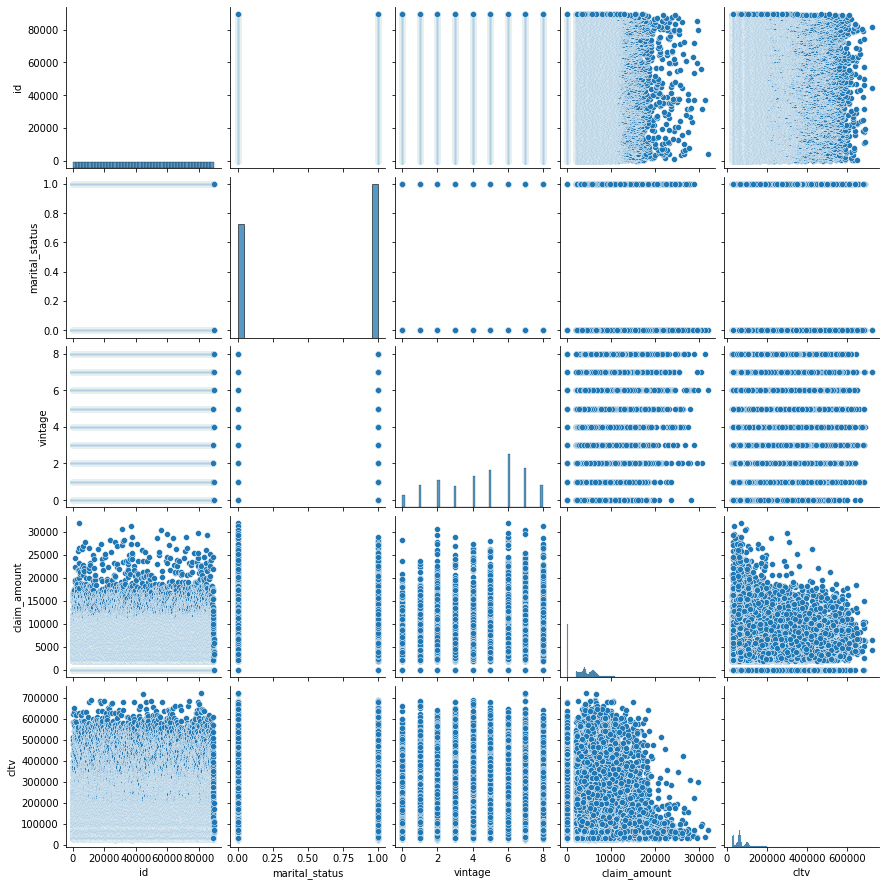

In [108]:
sns.pairplot(numericdf, markers=["o", "s", "D"])

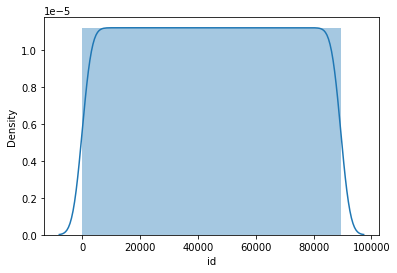

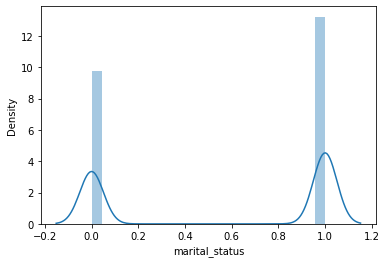

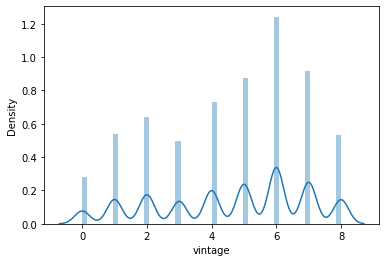

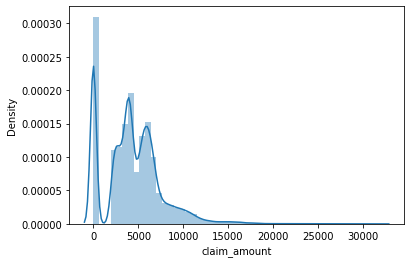

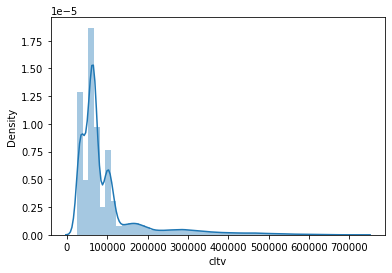

In [109]:
for i in numericdf.columns:
    sns.distplot(numericdf[i])
    plt.show()

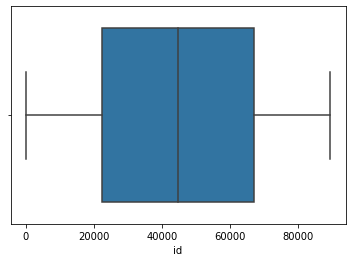

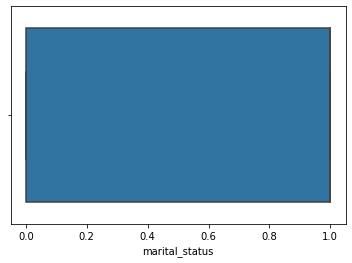

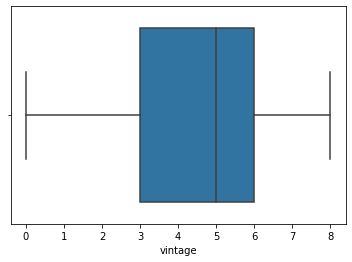

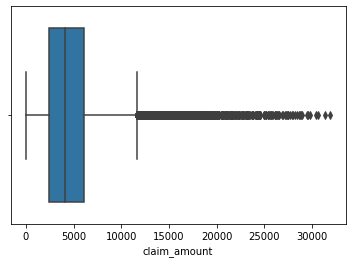

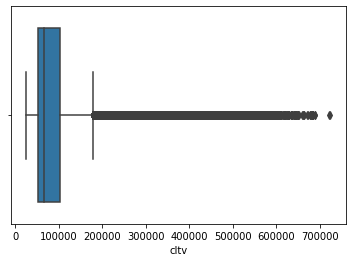

In [110]:
for i in numericdf.columns:
    sns.boxplot(numericdf[i])
    plt.show()

In [111]:
not_numeric_new=[]
for label,content in df_raw.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric_new.append(label)
not_numeric_new

['gender',
 'area',
 'qualification',
 'income',
 'num_policies',
 'policy',
 'type_of_policy']

In [112]:
nonnumericdf=df_raw[not_numeric_new]
nonnumericdf.head()

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,More than 1,A,Gold


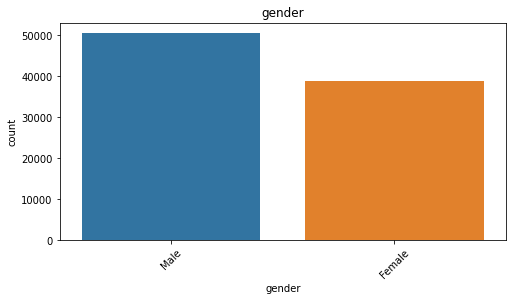

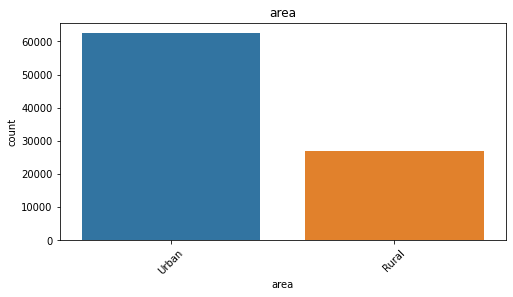

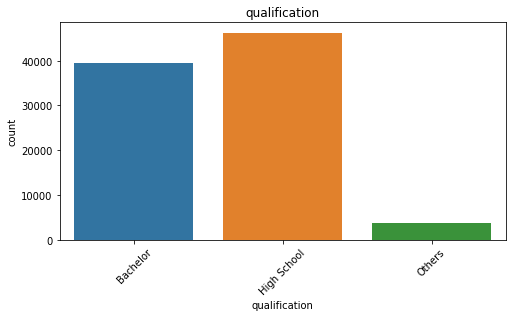

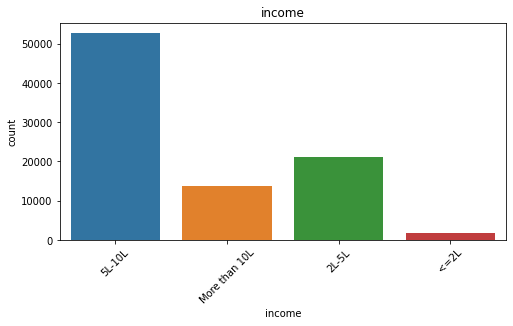

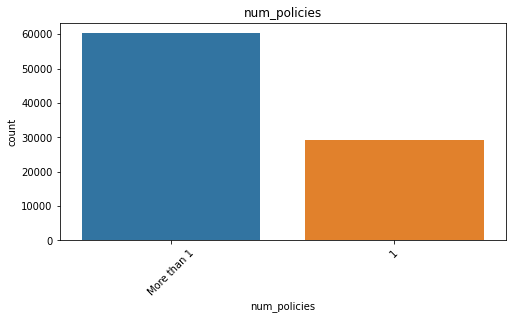

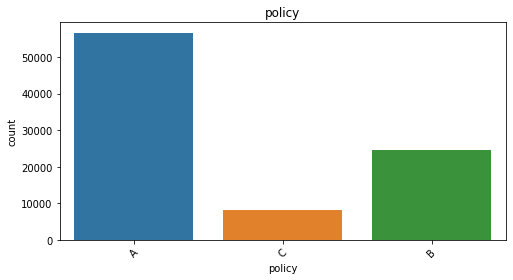

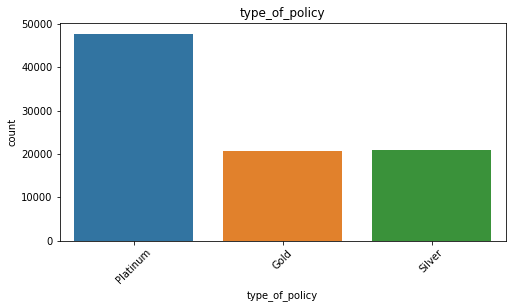

In [113]:
for col in not_numeric_new:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

## Outlier

In [114]:
from scipy import stats

In [115]:
df.shape

(89392, 12)

In [116]:
df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [117]:
df_new.shape

(77982, 12)

In [118]:
df_new.columns

Index(['area', 'qualification', 'income', 'marital_status', 'vintage',
       'claim_amount', 'num_policies', 'type_of_policy', 'cltv', 'policy_A',
       'policy_B', 'policy_C'],
      dtype='object')

In [119]:
reordered_columns=['area', 'qualification', 'income', 'marital_status', 'vintage',
       'claim_amount', 'num_policies', 'type_of_policy', 'policy_A',
       'policy_B', 'policy_C', 'cltv']

In [120]:
df_new.columns=reordered_columns

In [121]:
numeric_new1=[]
for label,content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new1.append(label)
numeric_new1

['area',
 'qualification',
 'income',
 'marital_status',
 'vintage',
 'claim_amount',
 'num_policies',
 'type_of_policy',
 'policy_A',
 'policy_B',
 'policy_C',
 'cltv']

In [122]:
numericdf=df_new[numeric_new1]

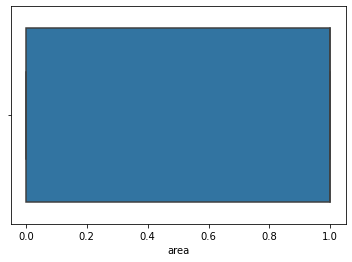

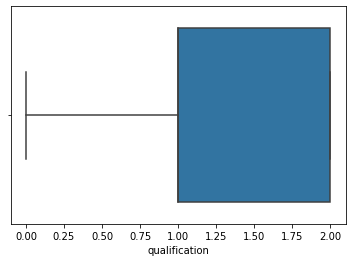

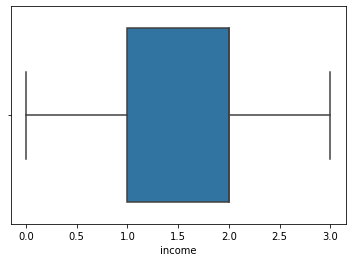

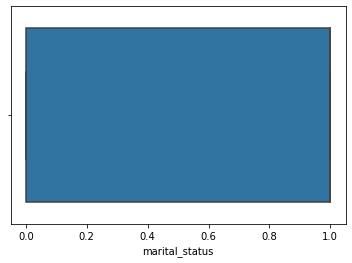

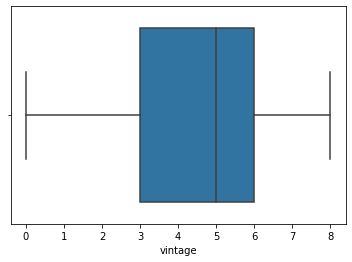

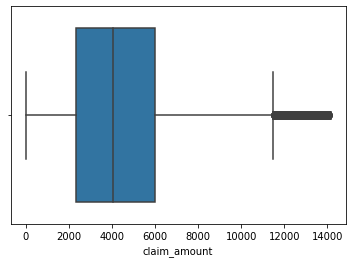

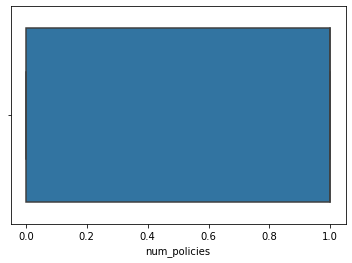

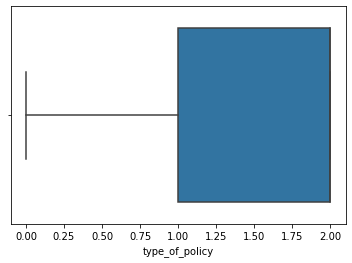

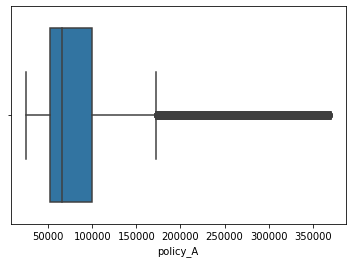

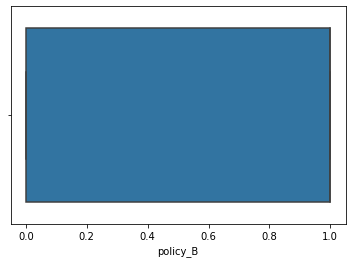

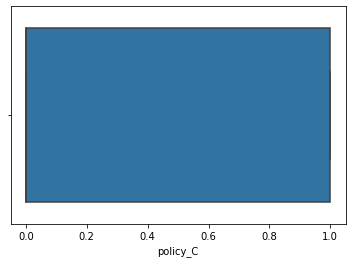

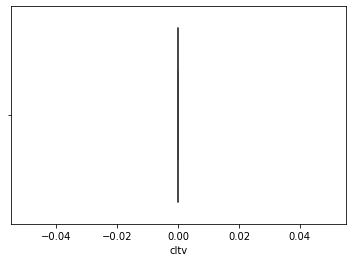

In [123]:
for i in numericdf.columns:
    sns.boxplot(numericdf[i])
    plt.show()

In [124]:
df_new['cltv'].unique()

array([0], dtype=uint8)

**Its better to avoid the removing of Outlier**

In [125]:
X=df.drop('cltv',axis=1)
y=df['cltv']

## Train Test Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
X_train.columns

Index(['area', 'qualification', 'income', 'marital_status', 'vintage',
       'claim_amount', 'num_policies', 'type_of_policy', 'policy_A',
       'policy_B', 'policy_C'],
      dtype='object')

In [129]:
len(X_train.columns)

11

## Saving Data in Pickle

In [130]:
X_train.to_pickle("./X_train.pkl")
X_test.to_pickle("./X_test.pkl")
y_train.to_pickle("./y_train.pkl")
y_test.to_pickle("./y_test.pkl")

X.to_pickle("./X.pkl")
y.to_pickle("./y.pkl")
df.to_pickle("./df.pkl")